In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

from spl.generators import SSPGenerator

/Users/shaysnyder/opt/anaconda3/envs/vsa-ogm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device: str = 'cuda' if torch.cuda.is_available() else 'cpu'
d_range = np.arange(1, 512, 2)
num_repeats = 500

cos_sim = nn.CosineSimilarity(dim=0, eps=1e-6)

In [3]:
avg_similarities = np.zeros((d_range.shape[0], num_repeats))

for i, d in enumerate(d_range):
    for j in range(num_repeats):
        ssp_gen = SSPGenerator(
            dimensionality=d,
            device=device,
        )
        ssp = ssp_gen.generate(2)

        avg_similarities[i, j] = cos_sim(ssp[0], ssp[1]).item()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


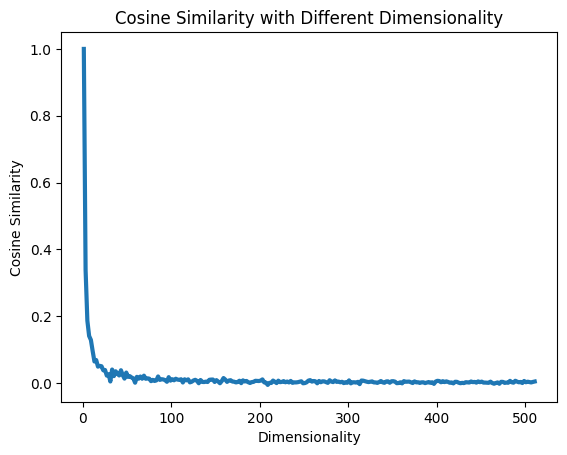

In [4]:
plt.plot(d_range, np.mean(avg_similarities, axis=1), linewidth=3)
plt.xlabel('Dimensionality')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity with Different Dimensionality')
plt.savefig('cosine_similarity_with_dimensionality.png', dpi=500)